In [1]:
# Para utilizar o código em outros modulos sem a necessidade de ficar reiniciando o notebook.
%load_ext autoreload
%autoreload 2

from gradual.engine import Value, Tensor
from gradual.util import draw_dot
import torch 
import numpy as np 
import math

In [3]:
def teste1():

    x1 = torch.Tensor([2.0])               ; x1.requires_grad = True
    x2 = torch.Tensor([0.0])               ; x2.requires_grad = True
    w1 = torch.Tensor([-3.0])              ; w1.requires_grad = True
    w2 = torch.Tensor([1.0])               ; w2.requires_grad = True
    b = torch.Tensor([6.8813735])          ; b.requires_grad = True
    n = (x1*w1) + (x2*w2) + b
    o = torch.tanh(n)
    
    print(o.data.item())
    o.backward()

    print('---grads---')
    print(f'x1={x1.grad.item()}')
    print(f'x2={x2.grad.item()}')
    print(f'w1={w1.grad.item()}')
    print(f'w2={w2.grad.item()}')
    print(f'b={b.grad.item()}')

 
teste1()

0.7071067094802856
---grads---
x1=-1.5000003576278687
x2=0.5000001192092896
w1=1.000000238418579
w2=0.0
b=0.5000001192092896


In [9]:
def teste2():

    x_dut = Tensor([2.0, 0.0])
    w_dut = Tensor([-3.0, 1.0])
    b_dut = Tensor([6.8813735])
    n_dut = (x_dut*w_dut).sum() + b_dut
    o_dut = n_dut.tanh()
    o_dut.backward()

    x_ref = torch.Tensor([2.0, 0.0])           ; x_ref.requires_grad = True
    w_ref = torch.Tensor([-3.0, 1.0])          ; w_ref.requires_grad = True
    b_ref = torch.Tensor([6.8813735])          ; b_ref.requires_grad = True
    n_ref = (x_ref*w_ref).sum() + b_ref
    o_ref = torch.tanh(n_ref)
    o_ref.backward()

    assert np.allclose(o_dut.data, o_ref.data.numpy()), f'o_dut.data={o_dut.data}, o_ref.data={o_ref.data.numpy()}'
    assert np.allclose(x_dut.grad, x_ref.grad.numpy()), f'x_dut.grad={x_dut.grad}, x_ref.grad={x_ref.grad.numpy()}'
    assert np.allclose(w_dut.grad, w_ref.grad.numpy()), f'w_dut.grad={w_dut.grad}, w_ref.grad={w_ref.grad.numpy()}'
    assert np.allclose(b_dut.grad, b_ref.grad.numpy()), f'b_dut.grad={b_dut.grad}, b_ref.grad={b_ref.grad.numpy()}'
 
teste2()

In [4]:
def teste3():

    x = Tensor([2.0, 0.0])
    w = Tensor([-3.0, 1.0])
    b = Tensor([6.8813735])
    n = (x*w).sum() + b
    o = n.tanh()
    
    print(o.data)
    o.backward()

    print('---grads---')
    print(f'x={x.grad}')
    print(f'w={w.grad}')
    print(f'b={b.grad}')

teste3()

[0.7071067]
---grads---
x=[-1.50000036  0.50000012]
w=[1.00000024 0.        ]
b=[0.50000012]


In [2]:
x = Tensor([2.0, 0.0], label='x')
w = Tensor([-3.0, 1.0], label='w')
b = Tensor([6.8813735], label='b')
n = (x*w).sum() + b
n.label='n'

o = n.tanh()
o.label='o'

print(o)
o.backward()
print(o)

# 

# b

Tensor(data=[0.7071067], grad=[0.], label=o dtype=<class 'numpy.float32'>)
Tensor(data=[0.7071067], grad=[1.], label=o dtype=<class 'numpy.float32'>)


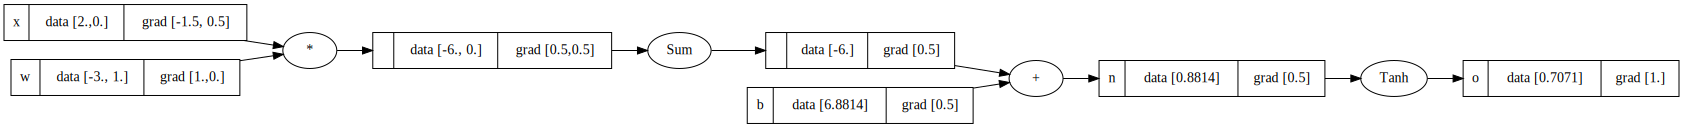

In [3]:
draw_dot(o)

In [24]:
np.ones(1)

array([1.])